# Produce conditional distributions in 5 regions.

Regions defined by MCS data:

* MCS core
* MCS shield
* cloud core
* cloud shield
* env

Areas are mutually exclusive - MCS core and MCS shield do not overlap. Results from here used for EGU talk.

* pre 24/4/23 EGU: work on data for one year (2019). Work without spatial info, apart from to split land/ocean (EGU talk on MCS *over land*).
* post EGU: redo analysis to save original info (as before - in "hist") and conditional distributions at each gridpoint ("hist2"). Make sure that the two methods agree where they should with proper summing.

In [1]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
import dask
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import xarray as xr

from mcs_prime import McsTracks
from mcs_prime.mcs_prime_config import PATHS
from mcs_prime import plotting as mplt

from remake import load_remake

In [26]:
era5_hists = load_remake('../../remakefiles/era5_histograms.py')

In [27]:
task = era5_hists.ConditionalERA5Hist.tasks[0]
regmask = task.load_regmask()

In [3]:
paths2 = [t.outputs['hist2'] for t in era5_hists.ConditionalERA5Hist.tasks]
paths2 = [p for p in paths2 if p.exists()]
paths2

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_01.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_02.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_03.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_04.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_05.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_06.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_hist_2020_08.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/gridpoint_his

In [4]:
datasets = [xr.open_dataset(p) for p in paths2[:2]]

In [5]:
ds2 = datasets[0]
ds2

<xarray.Dataset>
Dimensions:                 (latitude: 481, longitude: 1440,
                             cape_hist_mid: 100, tcwv_hist_mid: 100,
                             LLS_shear_hist_mid: 100, L2M_shear_hist_mid: 100,
                             MLS_shear_hist_mid: 100, vimfd_hist_mid: 100,
                             cape_hist_mids: 100, cape_bins: 101,
                             tcwv_hist_mids: 100, tcwv_bins: 101,
                             LLS_shear_hist_mids: 100, LLS_shear_bins: 101,
                             L2M_shear_hist_mids: 100, L2M_shear_bins: 101,
                             MLS_shear_hist_mids: 100, MLS_shear_bins: 101,
                             vimfd_hist_mids: 100, vimfd_bins: 101)
Coordinates: (12/14)
  * latitude                (latitude) float32 60.0 59.75 59.5 ... -59.75 -60.0
  * longitude               (longitude) float32 0.0 0.25 0.5 ... 359.5 359.8
  * cape_hist_mids          (cape_hist_mids) float64 25.0 75.0 ... 4.975e+03
  * cape_bins               (cape_bins) float64 0.0 50.0 ... 4.95e+03 5e+03
  * tcwv_hist_mids          (tcwv_hist_mids) float64 0.5 1.5 2.5 ... 98.5 99.5
  * tcwv_bins               (tcwv_bins) float64 0.0 1.0 2.0 ... 98.0 99.0 100.0
    ...                      ...
  * L2M_shear_hist_mids     (L2M_shear_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * L2M_shear_bins          (L2M_shear_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * MLS_shear_hist_mids     (MLS_shear_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * MLS_shear_bins          (MLS_shear_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * vimfd_hist_mids         (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins              (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/30)
    cape_MCS_shield         (latitude, longitude, cape_hist_mid) float64 ...
    cape_MCS_core           (latitude, longitude, cape_hist_mid) float64 ...
    cape_cloud_shield       (latitude, longitude, cape_hist_mid) float64 ...
    cape_cloud_core         (latitude, longitude, cape_hist_mid) float64 ...
    cape_env                (latitude, longitude, cape_hist_mid) float64 ...
    tcwv_MCS_shield         (latitude, longitude, tcwv_hist_mid) float64 ...
    ...                      ...
    MLS_shear_env           (latitude, longitude, MLS_shear_hist_mid) float64 ...
    vimfd_MCS_shield        (latitude, longitude, vimfd_hist_mid) float64 ...
    vimfd_MCS_core          (latitude, longitude, vimfd_hist_mid) float64 ...
    vimfd_cloud_shield      (latitude, longitude, vimfd_hist_mid) float64 ...
    vimfd_cloud_core        (latitude, longitude, vimfd_hist_mid) float64 ...
    vimfd_env               (latitude, longitude, vimfd_hist_mid) float64 ...

In [6]:
# Right syntax/invocation? Don't know - the kernal crashes when I try to run.
# Despite limiting to 2 datasets.
# ds2 = xr.concat(datasets, pd.Index(range(len(datasets)), name='time_index'))

In [8]:
ds2.cape_MCS_core.sum(dim=['latitude', 'longitude'])

<xarray.DataArray 'cape_MCS_core' (cape_hist_mid: 100)>
array([4.42985e+05, 1.35749e+05, 1.40784e+05, 1.64294e+05, 1.89805e+05,
       2.13387e+05, 2.26832e+05, 2.34330e+05, 2.30707e+05, 2.20806e+05,
       2.04829e+05, 1.84759e+05, 1.64320e+05, 1.42650e+05, 1.24666e+05,
       1.08503e+05, 9.48080e+04, 8.16440e+04, 7.04830e+04, 6.05190e+04,
       5.30790e+04, 4.64550e+04, 4.05140e+04, 3.57150e+04, 3.13440e+04,
       2.76690e+04, 2.46870e+04, 2.20790e+04, 1.98190e+04, 1.79580e+04,
       1.62610e+04, 1.48430e+04, 1.36470e+04, 1.22780e+04, 1.13390e+04,
       1.04110e+04, 9.44200e+03, 8.78400e+03, 8.07700e+03, 7.55000e+03,
       7.01100e+03, 6.48400e+03, 6.13400e+03, 5.71100e+03, 5.15500e+03,
       4.78000e+03, 4.42900e+03, 4.12200e+03, 3.81700e+03, 3.55100e+03,
       3.33900e+03, 3.12000e+03, 2.83000e+03, 2.60500e+03, 2.46000e+03,
       2.20900e+03, 2.04900e+03, 1.83800e+03, 1.76600e+03, 1.59500e+03,
       1.47400e+03, 1.39800e+03, 1.24000e+03, 1.21400e+03, 1.16500e+03,
       1.01400e+03, 1.04200e+03, 9.57000e+02, 8.56000e+02, 8.32000e+02,
       7.89000e+02, 7.54000e+02, 6.68000e+02, 6.62000e+02, 5.88000e+02,
       5.65000e+02, 5.22000e+02, 5.33000e+02, 5.21000e+02, 4.61000e+02,
       4.22000e+02, 4.02000e+02, 3.50000e+02, 3.60000e+02, 3.32000e+02,
       3.22000e+02, 3.06000e+02, 2.97000e+02, 2.46000e+02, 2.36000e+02,
       1.91000e+02, 1.83000e+02, 1.76000e+02, 1.70000e+02, 1.44000e+02,
       1.21000e+02, 1.12000e+02, 1.23000e+02, 9.00000e+01, 1.02000e+02])
Dimensions without coordinates: cape_hist_mid

In [9]:
paths = [t.outputs['hist'] for t in era5_hists.ConditionalERA5Hist.tasks]
paths = [p for p in paths if p.exists()]
paths

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_01.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_02.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_03.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_04.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_05.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_06.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_08.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/conditional_era5_histograms/2020/hourly_hist_2020_09.nc'),
 PosixPa

In [10]:
ds = xr.open_dataset(paths[0])

In [11]:
ds

<xarray.Dataset>
Dimensions:                       (time: 726, cape_hist_mid: 100,
                                   tcwv_hist_mid: 100, LLS_shear_hist_mid: 100,
                                   L2M_shear_hist_mid: 100,
                                   MLS_shear_hist_mid: 100,
                                   vimfd_hist_mid: 100, cape_hist_mids: 100,
                                   cape_bins: 101, tcwv_hist_mids: 100,
                                   ...
                                   LLS_shear_bins: 101,
                                   L2M_shear_hist_mids: 100,
                                   L2M_shear_bins: 101,
                                   MLS_shear_hist_mids: 100,
                                   MLS_shear_bins: 101, vimfd_hist_mids: 100,
                                   vimfd_bins: 101)
Coordinates: (12/13)
  * time                          (time) datetime64[ns] 2020-01-01T00:30:00 ....
  * cape_hist_mids                (cape_hist_mids) float64 25.0 ... 4.975e+03
  * cape_bins                     (cape_bins) float64 0.0 50.0 ... 5e+03
  * tcwv_hist_mids                (tcwv_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * tcwv_bins                     (tcwv_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * LLS_shear_hist_mids           (LLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
    ...                            ...
  * L2M_shear_hist_mids           (L2M_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * L2M_shear_bins                (L2M_shear_bins) float64 0.0 1.0 ... 100.0
  * MLS_shear_hist_mids           (MLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * MLS_shear_bins                (MLS_shear_bins) float64 0.0 1.0 ... 100.0
  * vimfd_hist_mids               (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins                    (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/90)
    all_cape_MCS_shield           (time, cape_hist_mid) float64 ...
    all_cape_MCS_core             (time, cape_hist_mid) float64 ...
    all_cape_cloud_shield         (time, cape_hist_mid) float64 ...
    all_cape_cloud_core           (time, cape_hist_mid) float64 ...
    all_cape_env                  (time, cape_hist_mid) float64 ...
    land_cape_MCS_shield          (time, cape_hist_mid) float64 ...
    ...                            ...
    land_vimfd_env                (time, vimfd_hist_mid) float64 ...
    ocean_vimfd_MCS_shield        (time, vimfd_hist_mid) float64 ...
    ocean_vimfd_MCS_core          (time, vimfd_hist_mid) float64 ...
    ocean_vimfd_cloud_shield      (time, vimfd_hist_mid) float64 ...
    ocean_vimfd_cloud_core        (time, vimfd_hist_mid) float64 ...
    ocean_vimfd_env               (time, vimfd_hist_mid) float64 ...

In [14]:
ds.all_cape_MCS_core.sum(dim='time')

<xarray.DataArray 'all_cape_MCS_core' (cape_hist_mid: 100)>
array([4.42985e+05, 1.35749e+05, 1.40784e+05, 1.64294e+05, 1.89805e+05,
       2.13387e+05, 2.26832e+05, 2.34330e+05, 2.30707e+05, 2.20806e+05,
       2.04829e+05, 1.84759e+05, 1.64320e+05, 1.42650e+05, 1.24666e+05,
       1.08503e+05, 9.48080e+04, 8.16440e+04, 7.04830e+04, 6.05190e+04,
       5.30790e+04, 4.64550e+04, 4.05140e+04, 3.57150e+04, 3.13440e+04,
       2.76690e+04, 2.46870e+04, 2.20790e+04, 1.98190e+04, 1.79580e+04,
       1.62610e+04, 1.48430e+04, 1.36470e+04, 1.22780e+04, 1.13390e+04,
       1.04110e+04, 9.44200e+03, 8.78400e+03, 8.07700e+03, 7.55000e+03,
       7.01100e+03, 6.48400e+03, 6.13400e+03, 5.71100e+03, 5.15500e+03,
       4.78000e+03, 4.42900e+03, 4.12200e+03, 3.81700e+03, 3.55100e+03,
       3.33900e+03, 3.12000e+03, 2.83000e+03, 2.60500e+03, 2.46000e+03,
       2.20900e+03, 2.04900e+03, 1.83800e+03, 1.76600e+03, 1.59500e+03,
       1.47400e+03, 1.39800e+03, 1.24000e+03, 1.21400e+03, 1.16500e+03,
       1.01400e+03, 1.04200e+03, 9.57000e+02, 8.56000e+02, 8.32000e+02,
       7.89000e+02, 7.54000e+02, 6.68000e+02, 6.62000e+02, 5.88000e+02,
       5.65000e+02, 5.22000e+02, 5.33000e+02, 5.21000e+02, 4.61000e+02,
       4.22000e+02, 4.02000e+02, 3.50000e+02, 3.60000e+02, 3.32000e+02,
       3.22000e+02, 3.06000e+02, 2.97000e+02, 2.46000e+02, 2.36000e+02,
       1.91000e+02, 1.83000e+02, 1.76000e+02, 1.70000e+02, 1.44000e+02,
       1.21000e+02, 1.12000e+02, 1.23000e+02, 9.00000e+01, 1.02000e+02])
Dimensions without coordinates: cape_hist_mid

In [16]:
(ds2.cape_MCS_core.sum(dim=['latitude', 'longitude']).values == ds.all_cape_MCS_core.sum(dim='time').values).all()

True

/tmp/ipykernel_1965/1525096560.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ds[f'{v}_hist_mids'].values, d1 / (d1 + d2), label=reg)
/tmp/ipykernel_1965/1525096560.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ds[f'{v}_hist_mids'].values, d1 / (d1 + d2), label=reg)
/tmp/ipykernel_1965/1525096560.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ds[f'{v}_hist_mids'].values, d1 / (d1 + d2), label=reg)


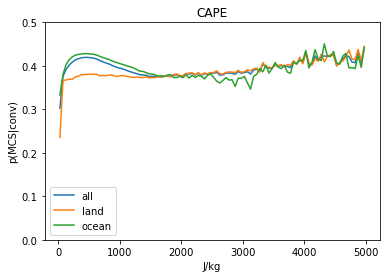

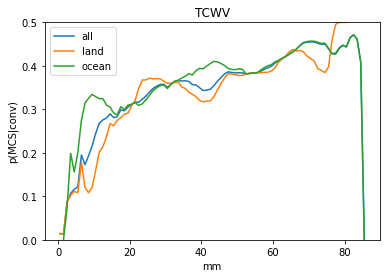

In [25]:
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for reg in ['all', 'land', 'ocean']:
        d1 = ds[f'{reg}_{v}_MCS_core'].sum(dim='time').values
        d2 = ds[f'{reg}_{v}_cloud_core'].sum(dim='time').values
    
        plt.plot(ds[f'{v}_hist_mids'].values, d1 / (d1 + d2), label=reg)
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 0.5))
    plt.legend()

/tmp/ipykernel_1965/247484017.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_1965/247484017.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_1965/247484017.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)


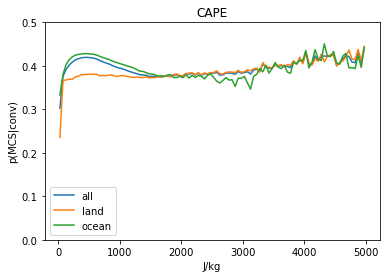

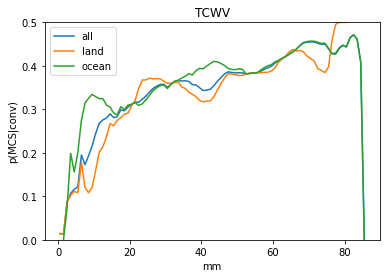

In [48]:
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for reg in ['all', 'land', 'ocean']:
        d1 = ds2[f'{v}_MCS_core'].values
        d2 = ds2[f'{v}_cloud_core'].values
        d1 = (d1 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        d2 = (d2 * regmask[reg][:, :, None]).sum(axis=(0, 1))
        d = d1 / (d1 + d2)
        # d[~regmask[reg]] = np.nan
        # print(d.shape)
        plt.plot(ds2[f'{v}_hist_mids'].values, d, label=reg)
    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 0.5))
    plt.legend()


/tmp/ipykernel_1965/3791602001.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/tmp/ipykernel_1965/3791602001.py:9: RuntimeWarning: invalid value encountered in true_divide
  d = d1 / (d1 + d2)
/home/users/mmuetz/miniconda3/envs/mcs_prime_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


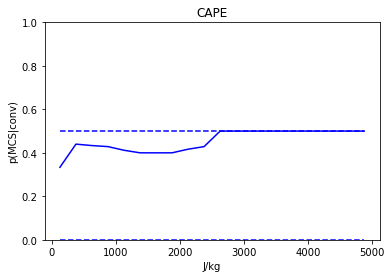

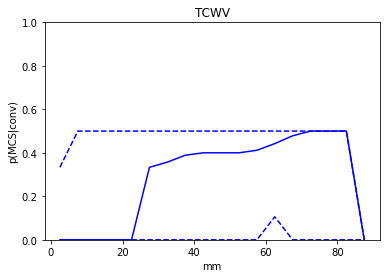

In [47]:
for v in ['cape', 'tcwv']:
    plt.figure()
    plt.title(v.upper())
    for reg in ['all']:
        d1 = ds2[f'{v}_MCS_core'].values.reshape(481, 1440, 20, 5).mean(axis=3)
        d2 = ds2[f'{v}_cloud_core'].values.reshape(481, 1440, 20, 5).mean(axis=3)
        # d1 = (d1 * regmask[reg][:, :, None])
        # d2 = (d2 * regmask[reg][:, :, None])
        d = d1 / (d1 + d2)
        d25, d50, d75 = np.nanpercentile(d, [10, 50, 90], axis=(0, 1))
        plt.plot(ds2[f'{v}_hist_mids'].values.reshape(20, 5).mean(axis=1), d50, 'b-', label=reg)
        plt.plot(ds2[f'{v}_hist_mids'].values.reshape(20, 5).mean(axis=1), d25, 'b--', label=reg)
        plt.plot(ds2[f'{v}_hist_mids'].values.reshape(20, 5).mean(axis=1), d75, 'b--', label=reg)

    if v == 'cape':
        plt.xlabel('J/kg')
    elif v == 'tcwv':
        plt.xlabel('mm')
    plt.ylabel('p(MCS|conv)')
    plt.ylim((0, 1))
    # plt.legend()


In [37]:
d50

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [2]:
def calc_xlim(ds, reg='all', v='cape', cutoff=0.9999):
    hist = np.array([
        np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0),
        np.nansum(ds[f'{reg}_{v}_env'].values, axis=0),
    ]).sum(axis=0)
    idx = np.where(np.cumsum(hist) / hist.sum() > cutoff)[0][0]
    return hist, (0, ds[f'{v}_hist_mids'].values[idx])

In [3]:
def plot_hist(ds, ax=None, reg='all', v='cape', s=None, log=True):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
        elif v[-5:] == 'shear':
            s = slice(0, 101, None)
        elif v == 'vimfd':
            s = slice(0, 101, None)            
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    def _plot_hist(ds, ax, h, fmt, title):
        bins = ds[f'{v}_bins'].values
        width = bins[1] - bins[0]
        h_density = h / (h.sum() * width)
        ax.plot(ds[f'{v}_hist_mids'].values[s], h_density[s], fmt, label=title);

    ax.set_title(f'{v.upper()} distributions')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0), 'r-', 'MCS core')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0), 'r--', 'MCS shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0), 'b-', 'cloud core')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0), 'b--', 'cloud shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{reg}_{v}_env'].values, axis=0), 'k-', 'env')
    ax.legend()
    if log:
        ax.set_yscale('log')
    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [4]:
def plot_hist_probs(ds, ax=None, reg='all', v='cape', s=None):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
        elif v[-5:] == 'shear':
            s = slice(0, 101, None)        
        elif v == 'vimfd':
            s = slice(0, 101, None)      
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        
    counts = np.zeros((5, ds[f'{reg}_{v}_MCS_core'].shape[1]))
    counts[0] = np.nansum(ds[f'{reg}_{v}_MCS_core'].values, axis=0)
    counts[1] = np.nansum(ds[f'{reg}_{v}_MCS_shield'].values, axis=0)
    counts[2] = np.nansum(ds[f'{reg}_{v}_cloud_core'].values, axis=0)
    counts[3] = np.nansum(ds[f'{reg}_{v}_cloud_shield'].values, axis=0)
    counts[4] = np.nansum(ds[f'{reg}_{v}_env'].values, axis=0)
    probs = counts / counts.sum(axis=0)[None, :]
    
    ax.set_title(f'{v.upper()} probabilities')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[0][s], 'r-', label='MCS core')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[1][s], 'r--', label='MCS shield')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[2][s], 'b-', label='cloud core')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[3][s], 'b--', label='cloud shield')
    ax.plot(ds[f'{v}_hist_mids'].values[s], probs[4][s], 'k-', label='env')
    ax.legend()

    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]


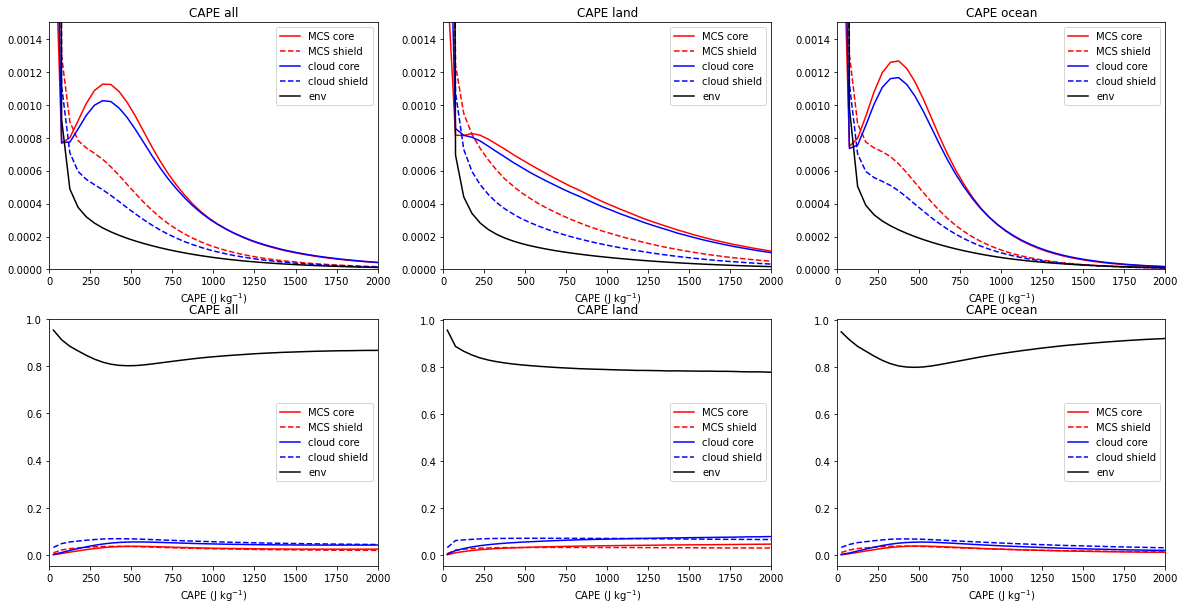

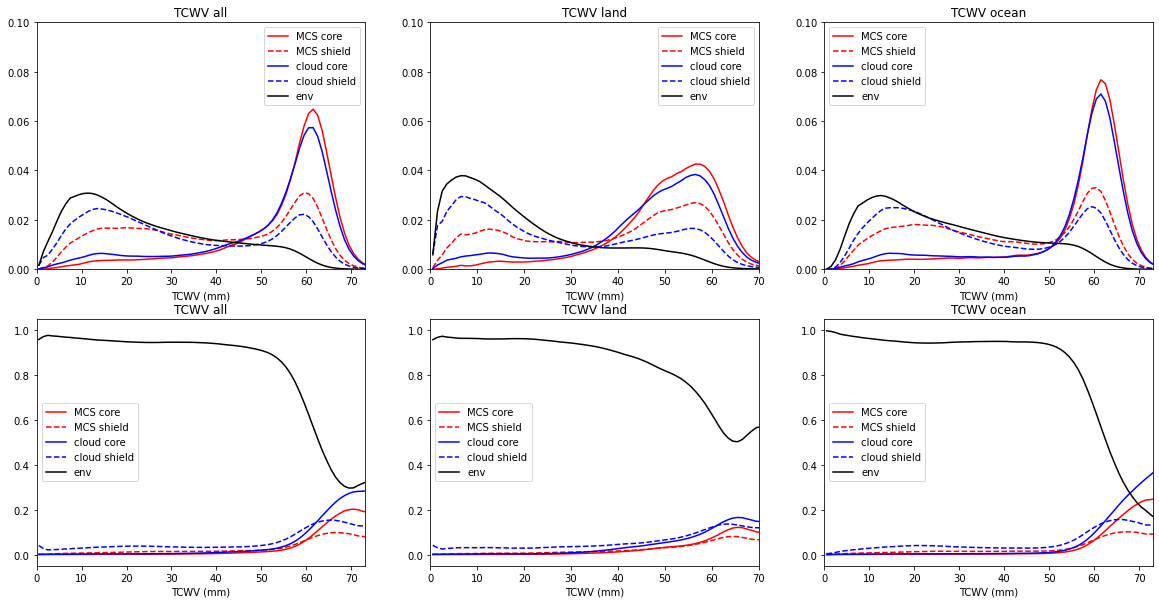

In [12]:
xlims = {
    ('cape', 'all'): (0, 2000),
    ('cape', 'land'): (0, 2000),
    ('cape', 'ocean'): (0, 2000),
    ('tcwv', 'all'): (0, 73),
    ('tcwv', 'land'): (0, 70),
    ('tcwv', 'ocean'): (0, 73),
}
for var in ['cape', 'tcwv']:
    fig, axes = plt.subplots(2, 3)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        if var == 'cape':
            ax.set_ylim((0, 0.0015))
            ax.set_title(f'CAPE {reg}')
        else:
            ax.set_ylim((0, 0.1))
            ax.set_title(f'TCWV {reg}')
        ax.set_xlim(xlims[(var, reg)])
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        if var == 'cape':
            # ax.set_xlim((0, 2500))
            ax.set_title(f'CAPE {reg}')
        else:
            ax.set_title(f'TCWV {reg}')
        ax.set_xlim(xlims[(var, reg)])


/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/ipykernel_1726/4038008419.py:21: RuntimeWarning: invalid value encountered in true_divide
  probs = counts / counts.sum(axis=0)[None, :]
/tmp/i

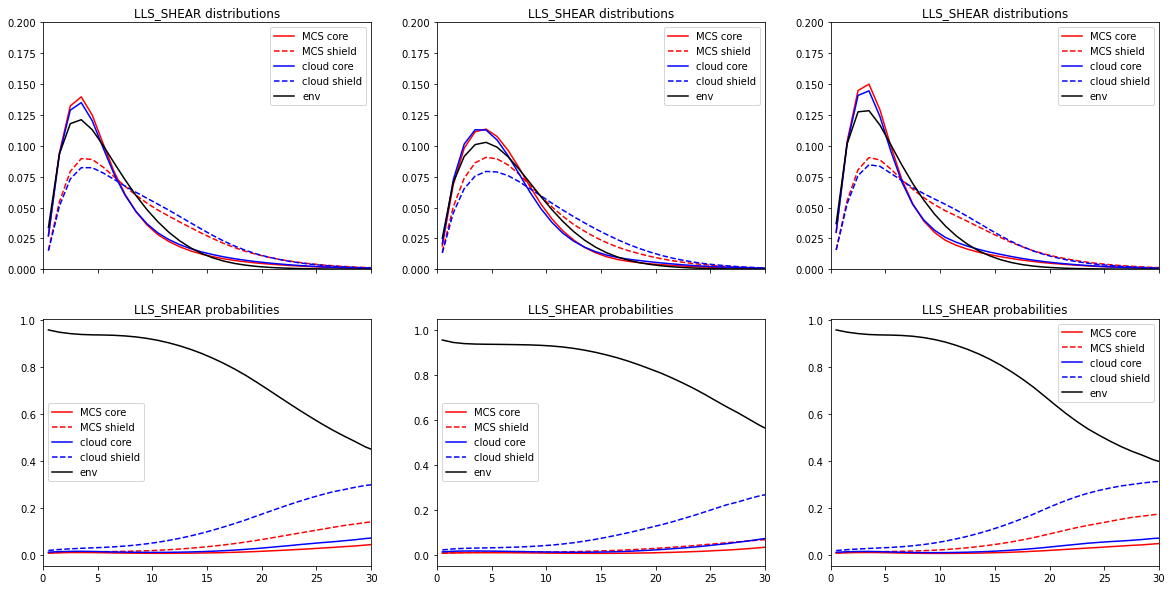

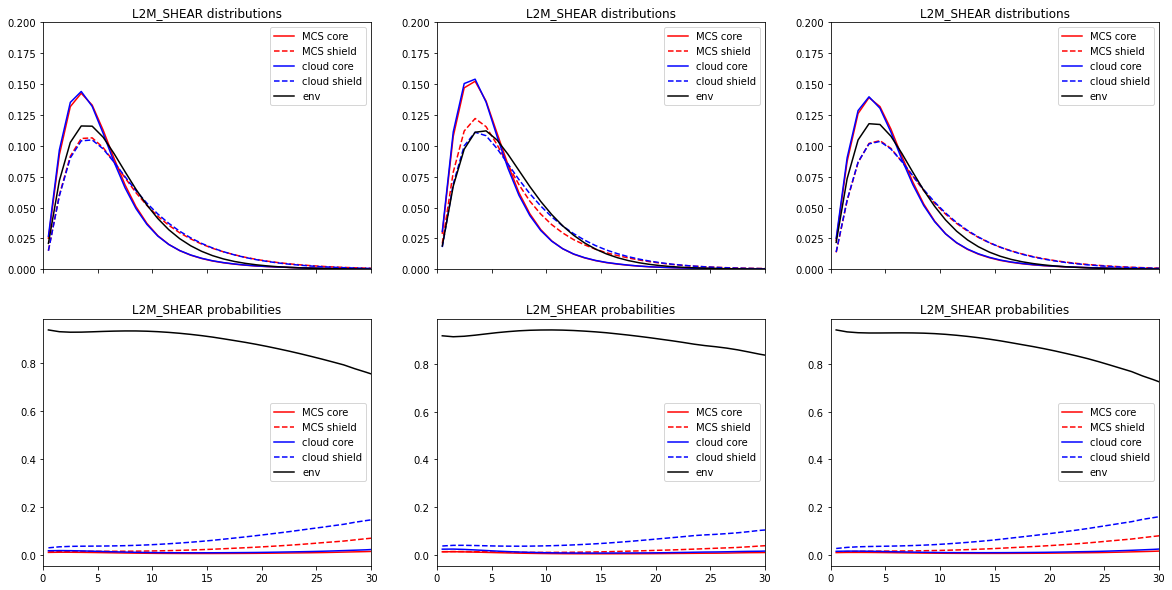

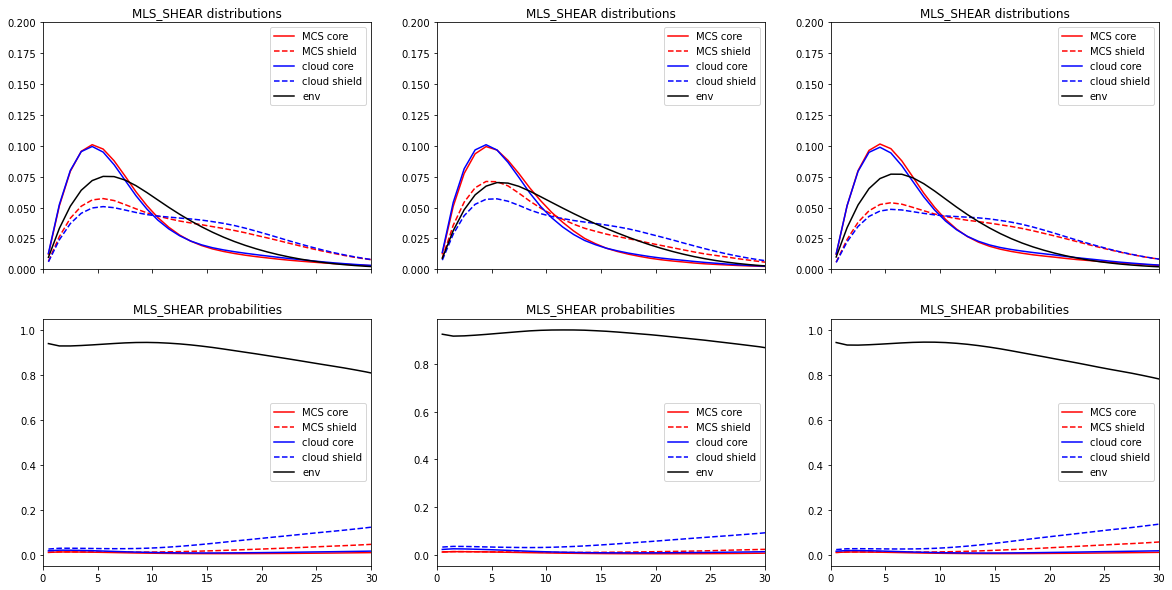

In [13]:
for var in ['LLS_shear', 'L2M_shear', 'MLS_shear']:
    fig, axes = plt.subplots(2, 3, sharex=True)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        ax.set_ylim((0, 0.2))
        ax.set_xlim((0, 30))
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        ax.set_xlim((0, 30))


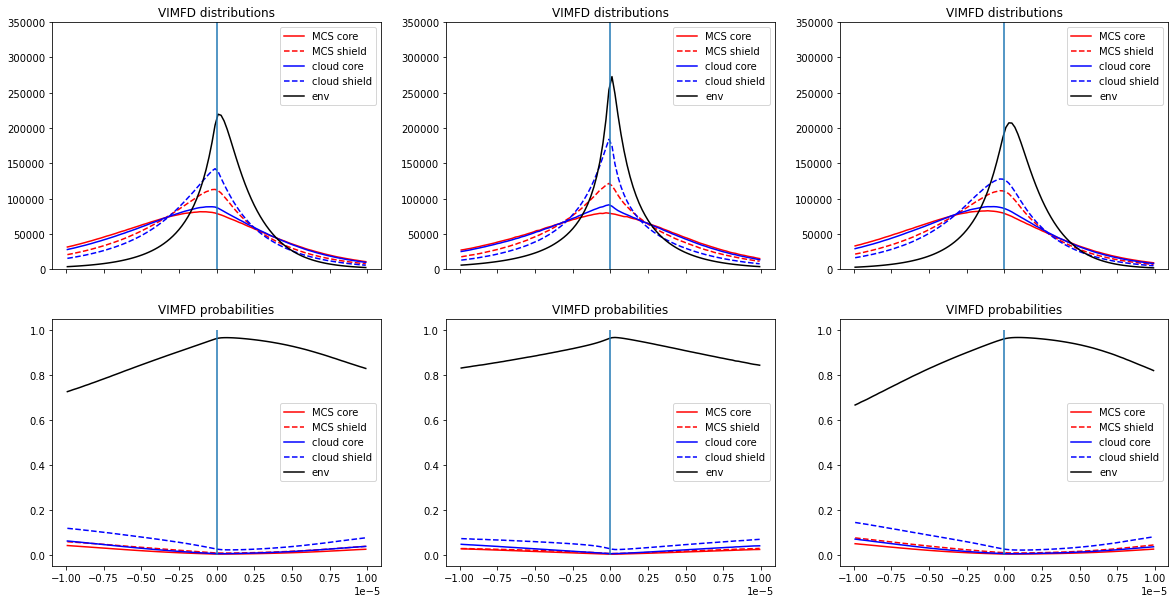

In [14]:
for var in ['vimfd']:
    fig, axes = plt.subplots(2, 3, sharex=True)
    fig.set_size_inches((20, 10))
    for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
        plot_hist(ds, ax=ax, reg=reg, v=var, log=False)
        ax.set_ylim((0, 35e4))
        ax.vlines(x=[0], ymin=0, ymax=35e4)
            
    for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
        plot_hist_probs(ds, reg=reg, v=var, ax=ax)
        ax.vlines(x=[0], ymin=0, ymax=1)


In [15]:
ds

<xarray.Dataset>
Dimensions:                       (time: 8022, cape_hist_mid: 100,
                                   tcwv_hist_mid: 100, LLS_shear_hist_mid: 100,
                                   L2M_shear_hist_mid: 100,
                                   MLS_shear_hist_mid: 100,
                                   vimfd_hist_mid: 100, cape_hist_mids: 100,
                                   cape_bins: 101, tcwv_hist_mids: 100,
                                   ...
                                   LLS_shear_bins: 101,
                                   L2M_shear_hist_mids: 100,
                                   L2M_shear_bins: 101,
                                   MLS_shear_hist_mids: 100,
                                   MLS_shear_bins: 101, vimfd_hist_mids: 100,
                                   vimfd_bins: 101)
Coordinates: (12/13)
  * time                          (time) datetime64[ns] 2020-01-01T00:30:00 ....
  * cape_hist_mids                (cape_hist_mids) float64 25.0 ... 4.975e+03
  * cape_bins                     (cape_bins) float64 0.0 50.0 ... 5e+03
  * tcwv_hist_mids                (tcwv_hist_mids) float64 0.5 1.5 ... 98.5 99.5
  * tcwv_bins                     (tcwv_bins) float64 0.0 1.0 2.0 ... 99.0 100.0
  * LLS_shear_hist_mids           (LLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
    ...                            ...
  * L2M_shear_hist_mids           (L2M_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * L2M_shear_bins                (L2M_shear_bins) float64 0.0 1.0 ... 100.0
  * MLS_shear_hist_mids           (MLS_shear_hist_mids) float64 0.5 1.5 ... 99.5
  * MLS_shear_bins                (MLS_shear_bins) float64 0.0 1.0 ... 100.0
  * vimfd_hist_mids               (vimfd_hist_mids) float64 -9.9e-06 ... 9.9e-06
  * vimfd_bins                    (vimfd_bins) float64 -1e-05 -9.8e-06 ... 1e-05
Dimensions without coordinates: cape_hist_mid, tcwv_hist_mid,
                                LLS_shear_hist_mid, L2M_shear_hist_mid,
                                MLS_shear_hist_mid, vimfd_hist_mid
Data variables: (12/90)
    all_cape_MCS_shield           (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_MCS_core             (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_cloud_shield         (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_cloud_core           (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    all_cape_env                  (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    land_cape_MCS_shield          (time, cape_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ...                            ...
    land_vimfd_env                (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_MCS_shield        (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_MCS_core          (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_cloud_shield      (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_cloud_core        (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>
    ocean_vimfd_env               (time, vimfd_hist_mid) float64 dask.array<chunksize=(726, 100), meta=np.ndarray>

# Tracks only splitting into land/ocean. Not used as I'm doing this on pixel data.

In [19]:
tracks = McsTracks.open(PATHS['statsdir'] / 'mcs_tracks_final_extc_20190101.0000_20200101.0000.nc', 
                        PATHS['pixeldir'])
ntracks = len(tracks.dstracks.tracks)

In [20]:
tracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 32843, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 1 2 3 ... 32839 32840 32841 32842
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 ...
    start_status             (tracks) float64 ...
    end_status               (tracks) float64 ...
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-02T12:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 ...
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [21]:
nanmask = np.isnan(tracks.dstracks.pf_landfrac.values)

In [22]:
landmask = np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) >= 0.9
ocmask = np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) < 0.1

In [23]:
landtracks = McsTracks(tracks.dstracks.isel(tracks=landmask))
octracks = McsTracks(tracks.dstracks.isel(tracks=ocmask))

In [24]:
landtracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 8254, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 11 12 15 18 ... 32839 32840 32842
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 20 12 10 13 11 11 20 ... 8 7 7 6 7 5
    start_status             (tracks) float64 13.0 1.0 15.0 1.0 ... 2.0 1.0 44.0
    end_status               (tracks) float64 21.0 0.0 0.0 3.0 ... 24.0 3.0 3.0
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-01T19:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 nan nan nan nan ... nan nan 17.0
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [25]:
octracks.dstracks

<xarray.Dataset>
Dimensions:                  (tracks: 17564, times: 400, mergers: 50, nmaxpf: 3)
Coordinates:
  * tracks                   (tracks) int64 0 2 3 4 ... 32832 32834 32835 32841
  * times                    (times) int64 0 1 2 3 4 5 ... 395 396 397 398 399
  * mergers                  (mergers) int64 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * nmaxpf                   (nmaxpf) int64 0 1 2
Data variables: (12/55)
    track_duration           (tracks) int32 37 17 40 12 16 9 8 ... 10 10 6 8 8 6
    start_status             (tracks) float64 13.0 13.0 15.0 ... 2.0 1.0 32.0
    end_status               (tracks) float64 37.0 0.0 3.0 34.0 ... 3.0 3.0 0.0
    start_basetime           (tracks) datetime64[ns] 2019-01-01T00:30:00 ... ...
    end_basetime             (tracks) datetime64[ns] 2019-01-02T12:30:00 ... ...
    start_split_cloudnumber  (tracks) float64 nan nan nan nan ... nan nan 60.0
    ...                       ...
    pf_mcsstatus             (tracks, times) float64 ...
    movement_distance        (tracks, times) float32 ...
    movement_speed           (tracks, times) float32 ...
    movement_theta           (tracks, times) float32 ...
    movement_distance_x      (tracks, times) float32 ...
    movement_distance_y      (tracks, times) float32 ...
Attributes: (12/23)
    Title:                       Statistics of each MCS track
    Institution:                 Pacific Northwest National Laboratory
    Contact:                     Zhe Feng, zhe.feng@pnnl.gov
    Created_on:                  Mon Feb 28 05:50:54 2022
    startdate:                   20190101.0000
    enddate:                     20200101.0000
    ...                          ...
    PF_PF_min_majoraxis_thresh:  20
    coefs_pf_area:               [2874.05    89.825]
    coefs_pf_rr:                 [3.01657   0.0144461]
    coefs_pf_skew:               [0.194462  0.0100072]
    coefs_pf_heavyratio:         [3.419024 0.438709]
    max_speed_thresh:            50

In [26]:
for thresh in [0.9, 0.95, 0.99, 1]:
    print(thresh, (np.nanmean(tracks.dstracks.pf_landfrac.values, axis=1) >= thresh).sum())

0.9 8254
0.95 7684
0.99 6881
1 5944


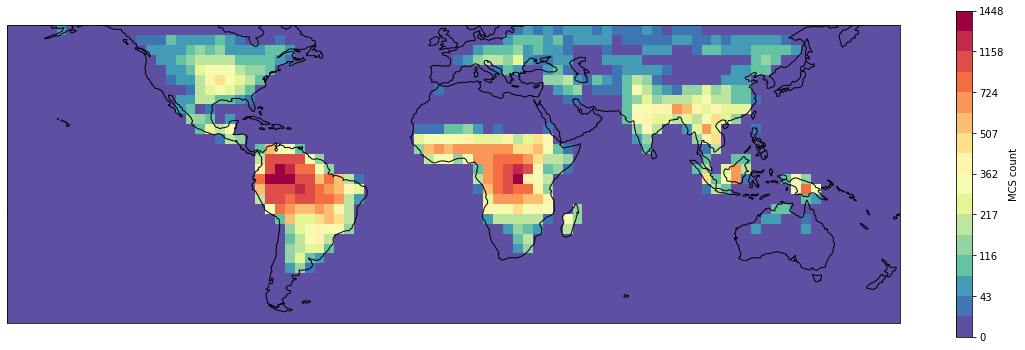

In [27]:
mplt.plot_geog_histogram(landtracks)

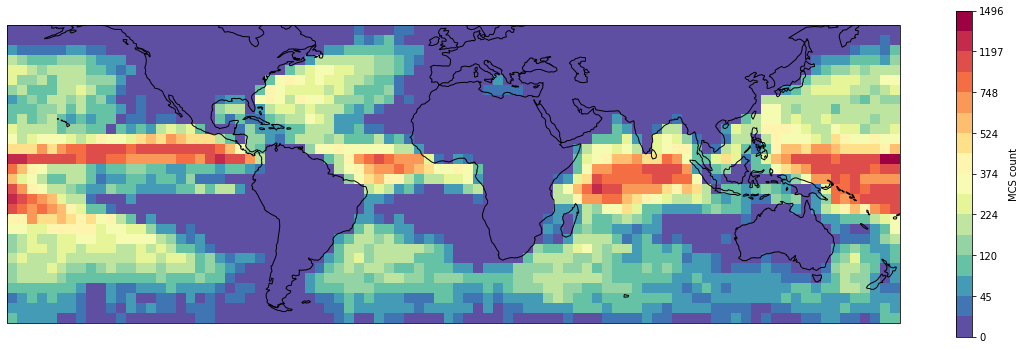

In [28]:
mplt.plot_geog_histogram(octracks)

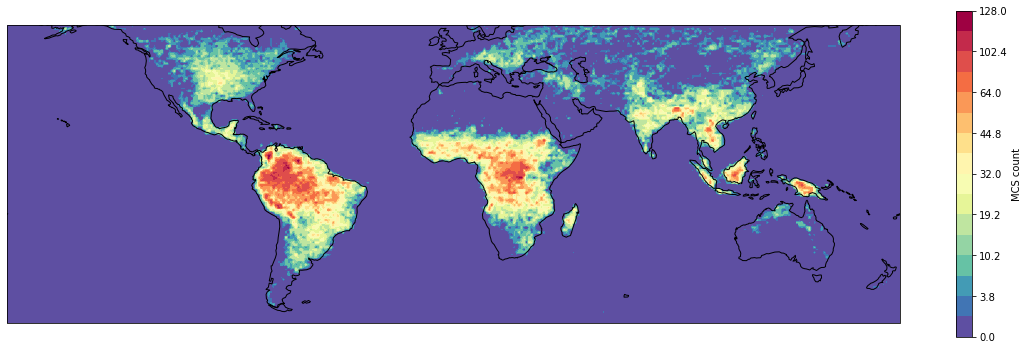

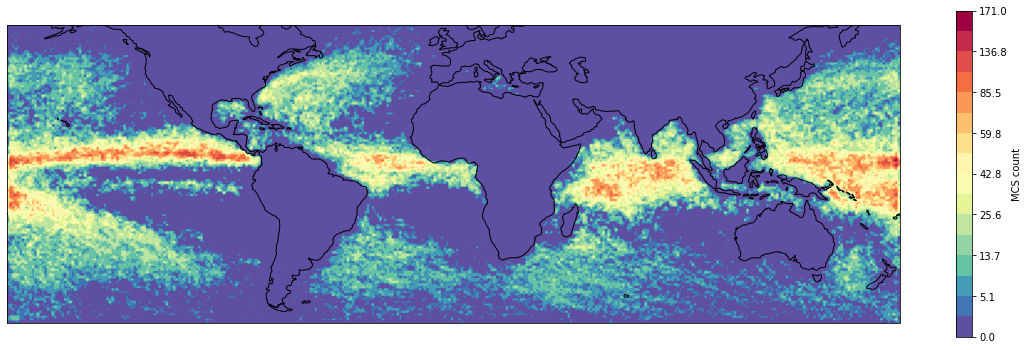

In [29]:
mplt.plot_geog_histogram(landtracks, dx=1, dy=1)
mplt.plot_geog_histogram(octracks, dx=1, dy=1)

# OLD - when each var had its own task.

In [ ]:
raise Exception('Do not run these cells! Want to keep output')

In [ ]:
def plot_hist(ds, ax=None, v='cape', s=None, log=True):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
    def _plot_hist(ds, ax, h, fmt, title):
        bins = ds.bins.values
        width = bins[1] - bins[0]
        h_density = h / (h.sum() * width)
        ax.plot(ds.hist_mid.values[s], h_density[s], fmt, label=title);

    ax.set_title(f'{v.upper()} distributions')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_MCS_core'].values, axis=0), 'r-', 'MCS core')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_MCS_shield'].values, axis=0), 'r--', 'MCS shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_cloud_core'].values, axis=0), 'b-', 'cloud core')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_cloud_shield'].values, axis=0), 'b--', 'cloud shield')
    _plot_hist(ds, ax, np.nansum(ds[f'{v}_env'].values, axis=0), 'k-', 'env')
    ax.legend()
    if log:
        ax.set_yscale('log')
    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [ ]:
def plot_hist_probs(ds, ax=None, v='cape', s=None):
    if s is None:
        if v == 'cape':
            s = slice(0, 500, None)
        elif v == 'tcwv':
            s = slice(0, 101, None)
    if ax is None:
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        
    counts = np.zeros((5, ds[f'{v}_MCS_core'].shape[1]))
    counts[0] = np.nansum(ds[f'{v}_MCS_core'].values, axis=0)
    counts[1] = np.nansum(ds[f'{v}_MCS_shield'].values, axis=0)
    counts[2] = np.nansum(ds[f'{v}_cloud_core'].values, axis=0)
    counts[3] = np.nansum(ds[f'{v}_cloud_shield'].values, axis=0)
    counts[4] = np.nansum(ds[f'{v}_env'].values, axis=0)
    probs = counts / counts.sum(axis=0)[None, :]
    
    ax.set_title(f'{v.upper()} probabilities')
    ax.plot(ds.hist_mid.values[s], probs[0][s], 'r-', label='MCS core')
    ax.plot(ds.hist_mid.values[s], probs[1][s], 'r--', label='MCS shield')
    ax.plot(ds.hist_mid.values[s], probs[2][s], 'b-', label='cloud core')
    ax.plot(ds.hist_mid.values[s], probs[3][s], 'b--', label='cloud shield')
    ax.plot(ds.hist_mid.values[s], probs[4][s], 'k-', label='env')
    ax.legend()

    if v == 'cape':
        ax.set_xlabel('CAPE (J kg$^{-1}$)')
    elif v == 'tcwv':
        ax.set_xlabel('TCWV (mm)')

In [ ]:
cape_paths = {r: era5_hists.OldCombineConditionalERA5Hist.tasks.filter(var='cape', region=r)[0].outputs['hist']
              for r in ['all', 'land', 'ocean']}

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True)
fig.set_size_inches((20, 10))
for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
    ds_cape = xr.open_dataset(cape_paths[reg])
    plot_hist(ds_cape, ax=ax, log=False)
    ax.set_xlim((0, 2500))
    ax.set_ylim((0, 0.0014))
    ax.set_title(f'CAPE {reg}')
for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
    ds_cape = xr.open_dataset(cape_paths[reg])
    plot_hist_probs(ds_cape, ax=ax)
    ax.set_xlim((0, 2500))
    ax.set_title(f'CAPE {reg}')

In [ ]:
tcwv_paths = {r: era5_hists.OldCombineConditionalERA5Hist.tasks.filter(var='tcwv', region=r)[0].outputs['hist']
              for r in ['all', 'land', 'ocean']}

In [ ]:
fig, axes = plt.subplots(2, 3, sharex=True)
fig.set_size_inches((20, 10))
for ax, reg in zip(axes[0], ['all', 'land', 'ocean']):
    ds_tcwv = xr.open_dataset(tcwv_paths[reg])
    plot_hist(ds_tcwv, ax=ax, v='tcwv', log=False)
    ax.set_ylim((0, 0.08))
    ax.set_title(f'TCWV {reg}')
for ax, reg in zip(axes[1], ['all', 'land', 'ocean']):
    ds_tcwv = xr.open_dataset(tcwv_paths[reg])
    plot_hist_probs(ds_tcwv, ax=ax, v='tcwv')
    ax.set_title(f'TCWV {reg}')

In [ ]:
t = era5_hists.ConditionalERA5Hist.tasks[0]

In [ ]:
t.inputs['era5_2020-01-01 00:00:00']

In [ ]:
t.inputs['e5pixel']

In [ ]:
xr.open_dataarray(t.inputs['era5_2020-01-01 00:00:00'])

In [ ]:
xr.open_dataarray(t.inputs['ERA5_land_sea_mask'])

In [ ]:
xr.open_dataset(t.inputs['e5pixel'])